# 例子1 使用线性回归拟合正弦函数

## 1. 导入相关包

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 2. 随机生成数据集
- 使用numpy随机生成包含200个点的数据集，包含自变量X和因变量Y，其中，自变量范围在-2π和2π之间，Y按照正弦函数来生成，并且加入随机噪声，Y值在-1到1之间

In [7]:
n_dots = 200

X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)
Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1);

## 3. 创建多项式拟合模型
- 使用sklearn.linear_model.LinearRegression初始化一个线性回归模型
- 使用PolynomialFeatures多项式生成模型构造不同阶的多项式，用degree参数控制多项式的度，degree=2表示2阶多项式
- 使用Pipeline把回归模型和多项式生成模型串接起来，它类似一个管道，可以实现二者的通信


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # 将 StandardScaler 加入到流水线中进行标准化处理
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("scaler", StandardScaler()),  # 数据归一化处理
        ("linear_regression", LinearRegression())  # 去除 normalize 参数
    ])
    
    return pipeline

### 4.考查不同阶多项式的训练结果
- 使用不同阶多项式进行训练,2,3,5,10阶
- 用均方误差评估每种多项式的训练结果

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

degrees = [2, 3, 5, 10]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X, Y)
    train_score = model.score(X, Y)
    mse = mean_squared_error(Y, model.predict(X))
    results.append({"model": model, "degree": d, "score": train_score, "mse": mse})
for r in results:
    print("degree: {}; train score: {}; mean squared error: {}".format(r["degree"], r["score"], r["mse"]))

degree: 2; train score: 0.14312658116964216; mean squared error: 0.4310571203931518
degree: 3; train score: 0.2643716444639723; mean squared error: 0.37006380831576263
degree: 5; train score: 0.8942265793112857; mean squared error: 0.05321017682920713
degree: 10; train score: 0.993948914123018; mean squared error: 0.0030440478092365127


### 5. 直观呈现不同阶多项式训练出的模型

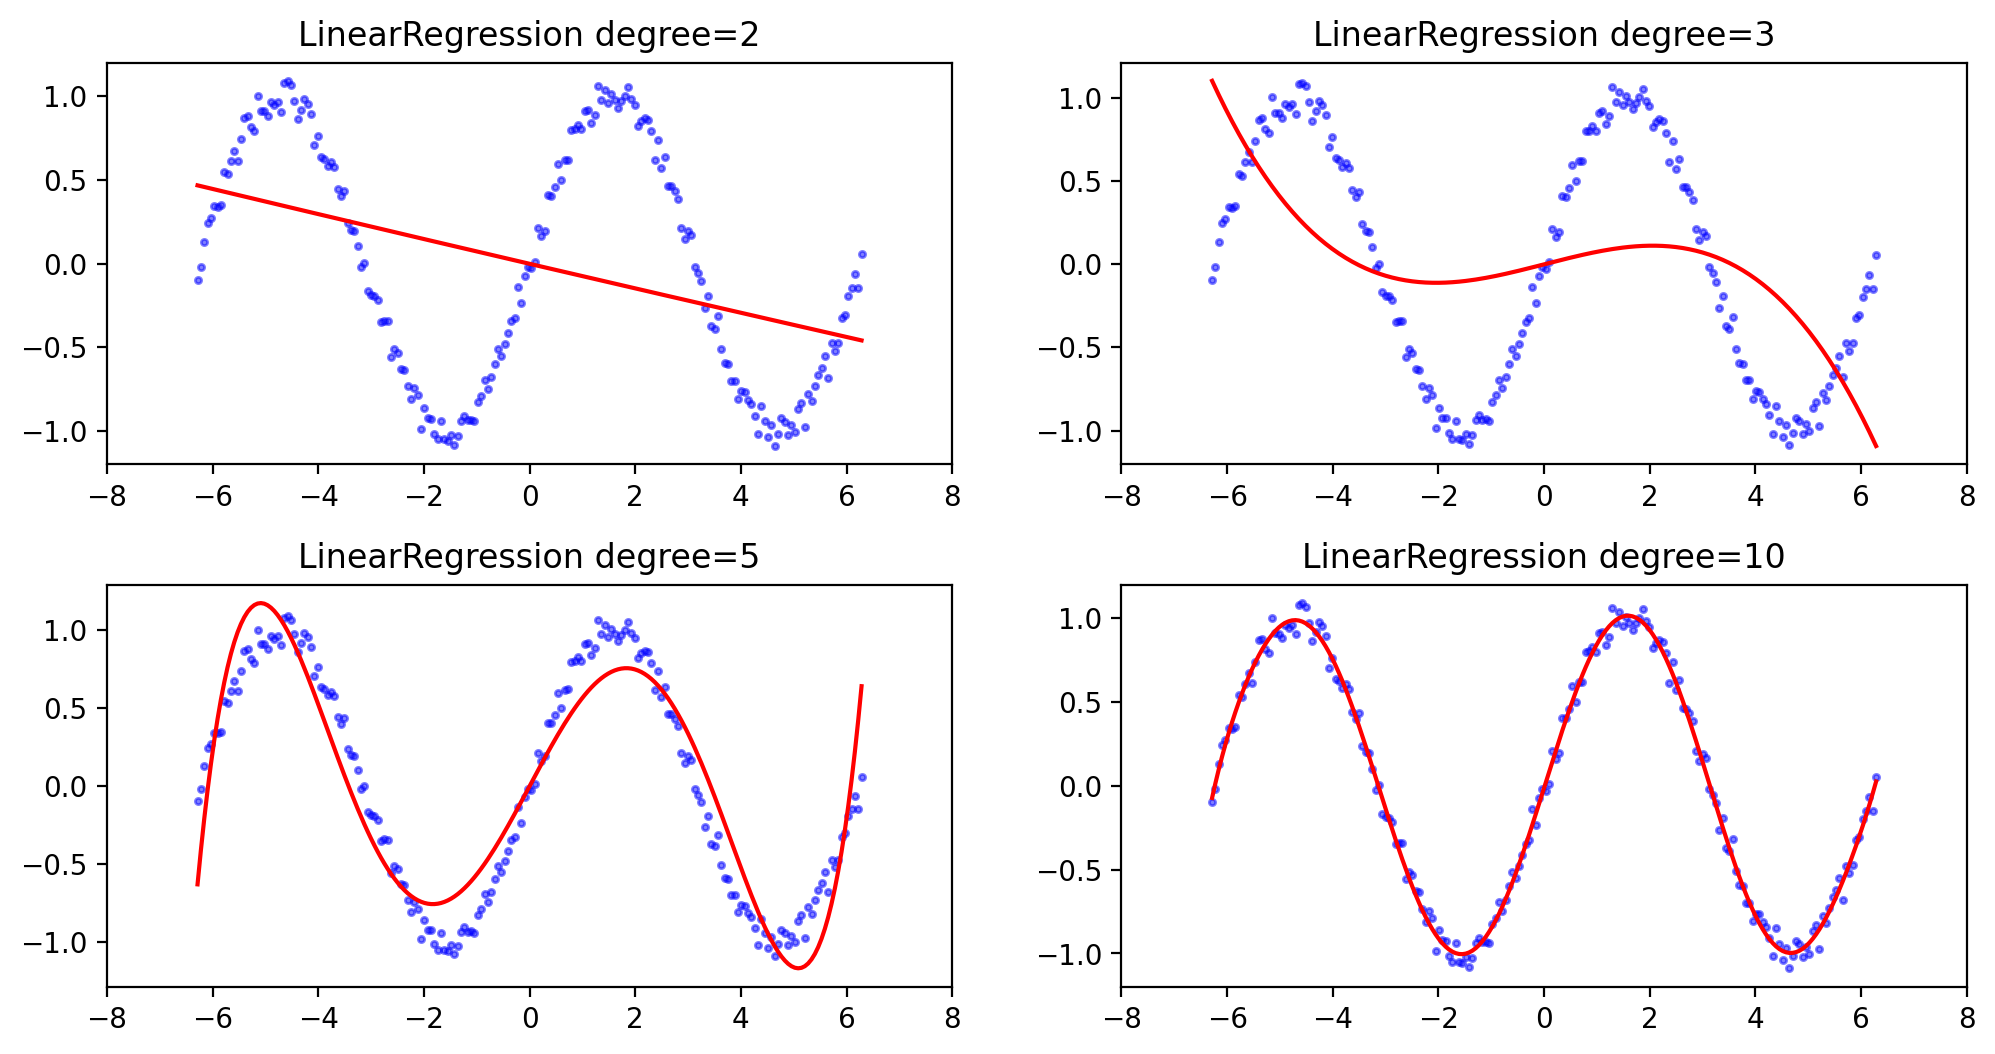

In [18]:
from matplotlib.figure import SubplotParams

plt.figure(figsize=(12, 6), dpi=200, subplotpars=SubplotParams(hspace=0.3))
for i, r in enumerate(results):
    fig = plt.subplot(2, 2, i+1)
    plt.xlim(-8, 8)
    plt.title("LinearRegression degree={}".format(r["degree"]))
    plt.scatter(X, Y, s=5, c='b', alpha=0.5)
    plt.plot(X, r["model"].predict(X), 'r-')